In [21]:
from pyvis.network import Network
import networkx as nx
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import json
import numpy as np

In [2]:
network = {}

In [3]:
with open("../datasets/Railway.csv") as f:

    prev_train = None
    prev_station = None

    for line in f:
        train, st_no, st_id, date, arr_time, dep_time, stay_time, mileage, lat, lon = line.split(",")
        lat = float(lat)
        lon = float(lon)

        if train != prev_train:
            prev_station = None
            network[train] = []

        station = {
            "id": int(st_id),
            "name": f"Station {st_id}",
            "lat": lat,
            "lon": lon,
            "from": prev_station["lat"] if prev_station else None,
            "to": None,
        }

        network[train].append(station)

        if prev_station:
            prev_station["to"] = (lat, lon)

        prev_train = train
        prev_station = station

In [4]:
#create hashtable of station id and (lat,long) as key
station_id = {}
for train in network:
    for station in network[train]:

        station_id[(station['lat'], station['lon'])] = station['id']

In [36]:
# create an empty graph
G = nx.MultiDiGraph()

# add nodes to the graph
for stations in network:
    for station in network[stations]:
        # print(station)
        #add note with the localisation for visualization
        G.add_node(station['id'], pos=(station['lon'], station['lat']))


# add edges to the graph
for stations in network:
    for station in network[stations]:
        from_node = station['id']
        to_node = None

        if type(station['to']) is tuple:
            # if the 'to' value is a tuple, create a new node
            to_node = station_id[station['to']]
            G.add_edge(from_node, to_node)
        else:
            continue


print("Multi Directed Graph:")
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print("\nDirected Graph:")

#convert to directed graph
G_directed = nx.DiGraph()
for u,v in G.nodes(data=True):
    G_directed.add_node(u, pos=v['pos'])
for u,v in G.edges():
    if G_directed.has_edge(u,v):
        continue
    else:
        G_directed.add_edge(u, v)

print("Number of nodes: ", G_directed.number_of_nodes())
print("Number of edges: ", G_directed.number_of_edges())
print("\nUndirected Graph:")

G_undirected = G_directed.to_undirected()
print("Number of nodes: ", G_undirected.number_of_nodes())
print("Number of edges: ", G_undirected.number_of_edges())

Multi Directed Graph:
Number of nodes:  2719
Number of edges:  64155

Directed Graph:
Number of nodes:  2719
Number of edges:  10778

Undirected Graph:
Number of nodes:  2719
Number of edges:  6175


# Graph Statistics

In [28]:
print("Graph Statistics:")
print("Clustering Coefficient: \t", nx.average_clustering(G))
print("Average Shortest Path Length: \t", nx.average_shortest_path_length(G))
print("Diameter: \t", nx.diameter(G))
print("Radius: \t", nx.radius(G))
print("Number of Nodes: \t", G.number_of_nodes())
print("Number of Edges: \t", G.number_of_edges())
print("Density: \t", nx.density(G))
print("Transitivity: \t", nx.transitivity(G))
print("Average Degree: \t", np.mean(list(dict(G.degree()).values())))
print("Average Clustering: \t", np.mean(list(nx.clustering(G).values())))
print("Average Eigenvector Centrality: \t", np.mean(list(nx.eigenvector_centrality(G).values())))
print("Average Betweenness Centrality: \t", np.mean(list(nx.betweenness_centrality(G).values())))
print("Average Closeness Centrality: \t", np.mean(list(nx.closeness_centrality(G).values())))
print("Average Degree Centrality: \t", np.mean(list(nx.degree_centrality(G).values())))
print("Average Page Rank: \t", np.mean(list(nx.pagerank(G).values())))
print("Average Harmonic Centrality: \t", np.mean(list(nx.harmonic_centrality(G).values())))
print("Average Load Centrality: \t", np.mean(list(nx.load_centrality(G).values())))

Graph Statistics:
Clustering Coefficient: 	 0.42282885981651164
Average Shortest Path Length: 	 8.786388321248479
Diameter: 	 47
Radius: 	 24
Number of Nodes: 	 2719
Number of Edges: 	 6175
Density: 	 0.0016711225424011825
Transitivity: 	 0.3216588861144284
Average Degree: 	 4.542111070246414
Average Clustering: 	 0.42282885981651236
Average Eigenvector Centrality: 	 0.00557924423431049
Average Betweenness Centrality: 	 0.0028658035779346577
Average Closeness Centrality: 	 0.1207731738230761
Average Degree Centrality: 	 0.001671122542401183
Average Page Rank: 	 0.0003677822728944465
Average Harmonic Centrality: 	 375.0662728697425
Average Load Centrality: 	 0.0028658035779346547


In [ ]:
#tabulate degree centrality, closeness centrality, Betweenness Centrality, Eigenvector Centrality
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigen_centrality = nx.eigenvector_centrality(G)

#display the statistics in a table
stats = pd.DataFrame([degree_centrality, closeness_centrality, betweenness_centrality, eigen_centrality]).T
stats.columns = ['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality']
#write to file
# stats.to_csv('stats.csv')

In [31]:
stats

,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality
692,0.004415,0.155181,0.022524,8.662295e-03
1351,0.003679,0.143794,0.016451,2.183319e-03
698,0.001104,0.125740,0.000000,2.516111e-04
944,0.002208,0.134828,0.001943,8.853901e-04
232,0.002943,0.125985,0.007017,2.492824e-04
...,...,...,...,...
2768,0.000736,0.090018,0.002940,3.234174e-08
2679,0.000736,0.082601,0.002206,2.466000e-09
2657,0.000736,0.076310,0.001471,1.880379e-10
2682,0.000736,0.070905,0.000736,1.433865e-11


# VISUALISATION

## Multi Directed Graph

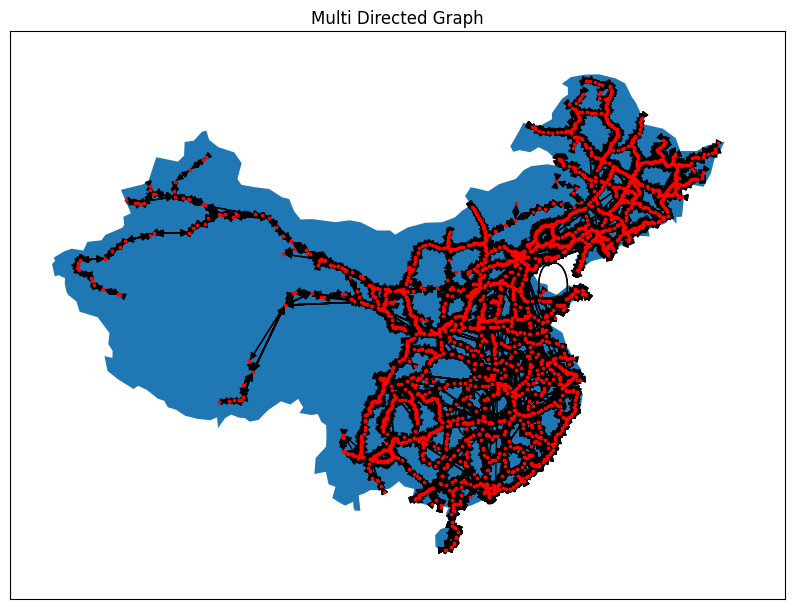

In [40]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

china=world[world['name'] == 'China']
china.plot(figsize=(10,10))

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G,pos, with_labels=False, node_size=3, node_color='red')

plt.axis('on')
plt.title("Multi Directed Graph")

plt.show()

## Directed Graph

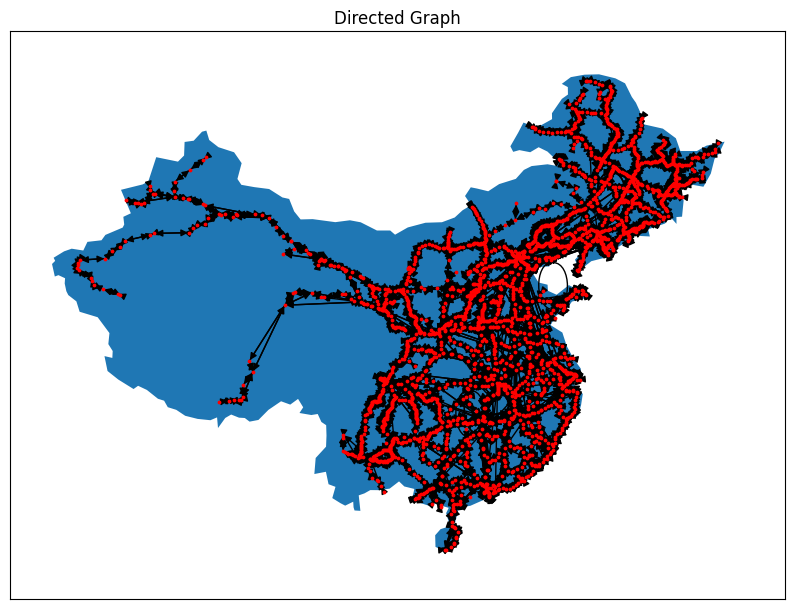

In [41]:
china.plot(figsize=(10,10))
pos = nx.get_node_attributes(G_directed, 'pos')
nx.draw(G_directed,pos, with_labels=False, node_size=3, node_color='red')

plt.axis('on')
plt.title("Directed Graph")

plt.show()

## Undirected Graph

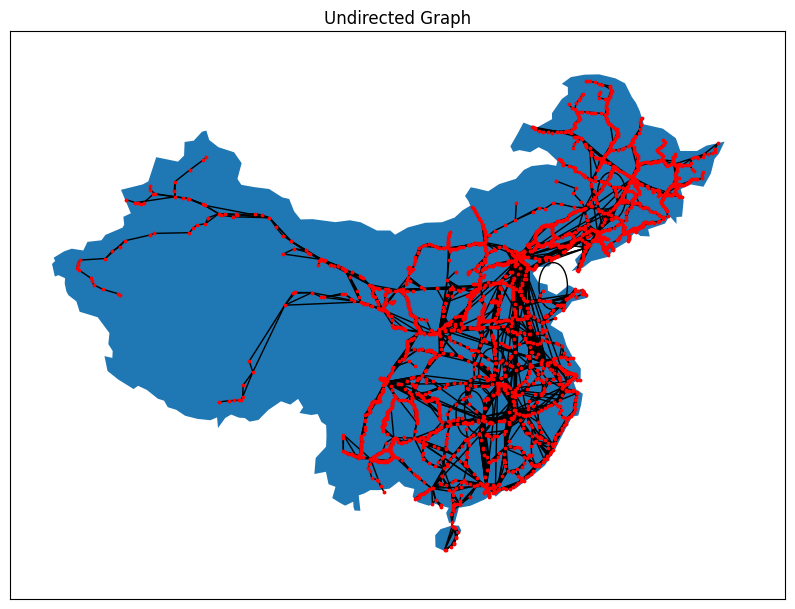

In [38]:
china.plot(figsize=(10,10))

pos = nx.get_node_attributes(G_undirected, 'pos')
nx.draw(G_undirected,pos, with_labels=False, node_size=3, node_color='red')

plt.axis('on')
plt.title("Undirected Graph")

plt.show()

# SHORTEST PATH ANALYSIS

In [52]:
def shortest_path(G, source, target):
    return nx.shortest_path(G, source=source, target=target)

In [53]:
shortest_path(G, 1136, 1095)

[1136, 1763, 389, 390, 2058, 802, 1070, 2065, 1100, 2144, 1095]

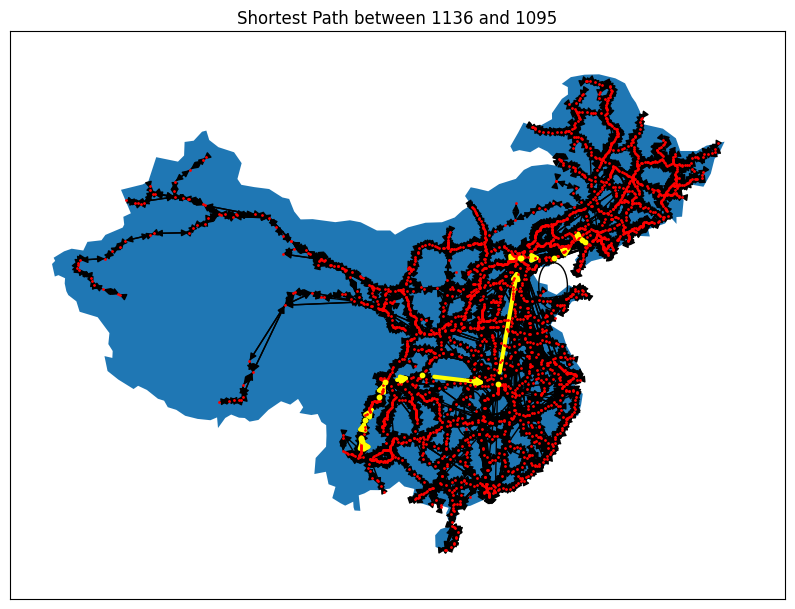

In [22]:
# Network Graph with the shortest path highlighted
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

china=world[world['name'] == 'China']
china.plot(figsize=(10,10))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=1, node_color='red')

shortest_path = nx.shortest_path(G, source=1095, target=1136)
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_size=10, node_color='yellow')
nx.draw_networkx_edges(G, pos, edgelist=list(zip(shortest_path, shortest_path[1:])), edge_color='yellow', width=3)

plt.axis('on')
plt.title("Shortest Path between 1136 and 1095")
plt.show()
